<a href="https://colab.research.google.com/github/divx1979/Kaggle-Projects/blob/master/DataScientist_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
da1 = pd.read_excel('/content/oil_retail_history.xlsx')

In [ ]:
print(da1.head())

        date  price   cost  comp1_price  comp2_price  comp3_price  volume
0 2023-01-01  97.66  86.46        98.39        99.10        97.37   13513
1 2023-01-02  96.46  87.25        95.37        96.25        97.38   13605
2 2023-01-03  94.67  86.40        94.41        94.69        94.50   16540
3 2023-01-04  97.32  87.51        99.12        96.90        97.54   14927
4 2023-01-05  94.08  86.38        93.31        94.61        93.85   13332


In [ ]:
print(da1.describe())

                      date       price        cost  comp1_price  comp2_price  \
count                  730  730.000000  730.000000   730.000000   730.000000   
mean   2023-12-31 12:00:00   96.505301   86.498178    96.551658    96.530068   
min    2023-01-01 00:00:00   88.080000   83.340000    88.320000    87.070000   
25%    2023-07-02 06:00:00   94.670000   85.302500    94.555000    94.827500   
50%    2023-12-31 12:00:00   96.525000   86.255000    96.590000    96.430000   
75%    2024-06-30 18:00:00   98.420000   87.610000    98.467500    98.447500   
max    2024-12-30 00:00:00  104.890000   91.860000   104.200000   105.000000   
std                    NaN    2.747598    1.575689     2.779654     2.796763   

       comp3_price        volume  
count   730.000000    730.000000  
mean     96.457260  13960.983562  
min      86.080000  11397.000000  
25%      94.712500  13326.250000  
50%      96.515000  13882.000000  
75%      98.097500  14538.750000  
max     104.360000  16890.000000  

In [8]:
print(da1.isnull().sum())

date           0
price          0
cost           0
comp1_price    0
comp2_price    0
comp3_price    0
volume         0
dtype: int64


In [10]:
import json

In [11]:
with open('today_example.json', 'r') as f:
  today_example = json.load(f)

In [12]:
print(today_example)

{'date': '2024-12-31', 'price': 94.45, 'cost': 85.77, 'comp1_price': 95.01, 'comp2_price': 95.7, 'comp3_price': 95.21}


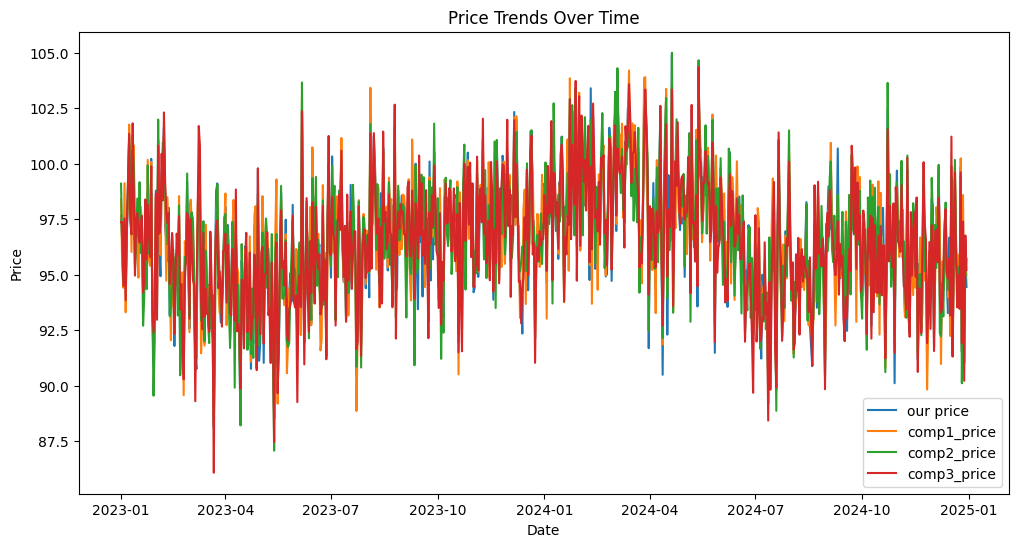

In [13]:
plt.figure(figsize = (12, 6))

plt.plot(da1['date'], da1['price'], label = 'our price')

plt.plot(da1['date'], da1['comp1_price'], label = 'comp1_price')

plt.plot(da1['date'], da1['comp2_price'], label = 'comp2_price')

plt.plot(da1['date'], da1['comp3_price'], label = 'comp3_price')

plt.legend()

plt.title('Price Trends Over Time')

plt.xlabel('Date')

plt.ylabel('Price')

plt.show()

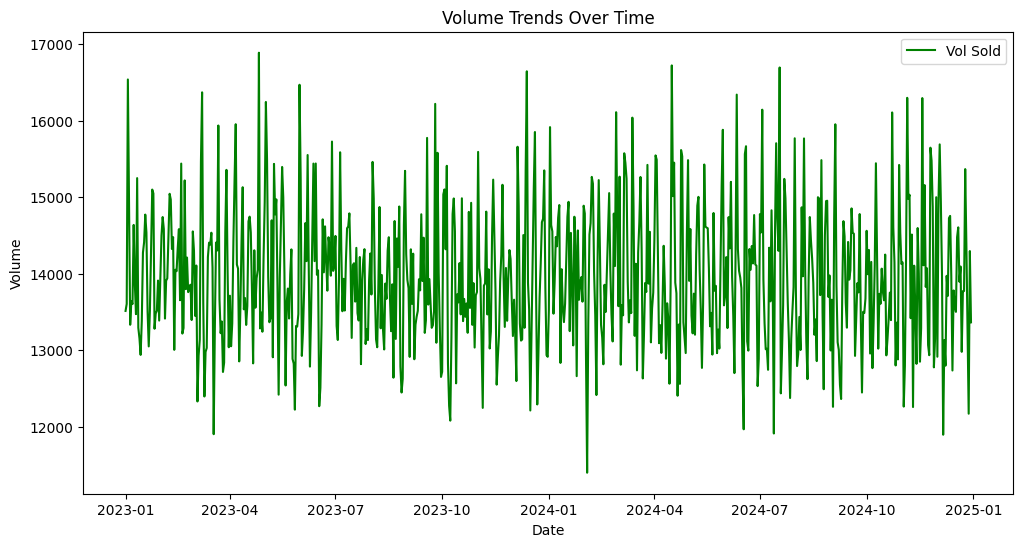

In [14]:
plt.figure(figsize = (12, 6))

plt.plot(da1['date'], da1['volume'], label = 'Vol Sold', color = 'green')

plt.legend()

plt.title('Volume Trends Over Time')

plt.xlabel('Date')

plt.ylabel('Volume')

plt.show()

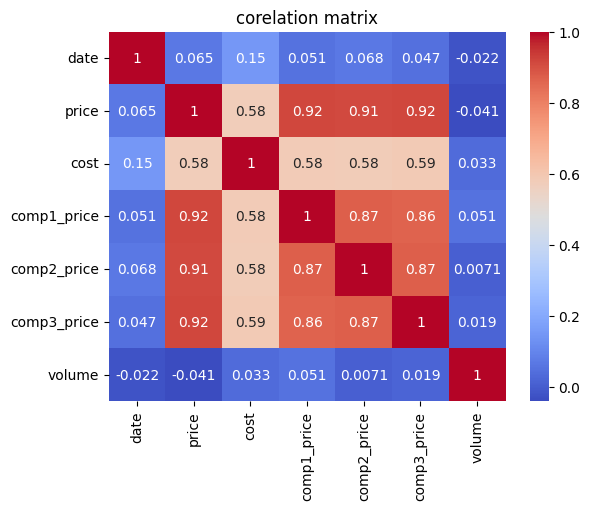

In [15]:
## Analyze The Relationship Price, Competitor Pr And Vol

import seaborn as sns

sns.heatmap(da1.corr(), annot = True, cmap = 'coolwarm')

plt.title('corelation matrix')

plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [17]:
##

da1['price_comp1_diff'] = da1['price'] - da1['comp1_price']

da1['price_comp2_diff'] = da1['price'] - da1['comp2_price']

da1['price_comp3_diff'] = da1['price'] - da1['comp3_price']

da1['rolling_price_3'] = da1['price'].rolling(window = 3).mean()

da1['rolling_volume_3'] = da1['volume'].rolling(window = 3).mean()

da1['day_of_week'] = pd.to_datetime(da1['date']).dt.dayofweek

da1.fillna(method = 'bfill', inplace = True)

/tmp/ipython-input-1686290058.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  da1.fillna(method = 'bfill', inplace = True)


In [20]:
##

features = ['price', 'cost', 'comp1_price', 'comp2_price', 'comp3_price',
            'price_comp1_diff', 'price_comp2_diff', 'price_comp3_diff',
            'rolling_price_3', 'rolling_volume_3', 'day_of_week']

X = da1[features]
y = da1['volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

mod = RandomForestRegressor(n_estimators = 100, random_state = 42)

mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 502.73719178082195


In [24]:
# --- Step 1: Price Optimization Function for Today ---

def recommend_price(today, model, cost, price_range=np.arange(0.9, 1.2, 0.01)):
    # Function to recommend the optimal price for today
    best_profit = -np.inf  # Initialize best profit as negative infinity
    best_price = today['price']  # Start with current price as best price
    for p in price_range:  # Iterate over possible prices
        # Build feature vector for today with candidate price
        features_today = [
            p,  # price
            today['cost'],  # cost
            today['comp1_price'],  # comp1_price
            today['comp2_price'],  # comp2_price
            today['comp3_price'],  # comp3_price
            p - today['comp1_price'],  # price_comp1_diff
            p - today['comp2_price'],  # price_comp2_diff
            p - today['comp3_price'],  # price_comp3_diff
            np.mean([today['price'], p]),  # rolling_price_3 (approximate)
            0,  # rolling_volume_3 (set to 0 or use recent history if available)
            pd.to_datetime(today['date']).dayofweek  # day_of_week
        ]
        predicted_volume = model.predict([features_today])[0]  # Predict volume
        profit = (p - cost) * predicted_volume  # Calculate profit
        if profit > best_profit:  # If this profit is better than previous best
            best_profit = profit  # Update best profit
            best_price = p  # Update best price
    return round(best_price, 2), round(best_profit, 2)  # Return best price and profit


In [27]:
# --- Step 2: Get Recommendation for Today ---

recommended_price, expected_profit = recommend_price(today_example, mod, today_example['cost'])
print(f"Recommended Price: {recommended_price}, Expected Profit: {expected_profit}")

# --- Step 3: Backtesting on Test Set ---

profits = []  # List to store profit results for each day in test set

for idx, row in X_test.iterrows():
    # For each day in the test set, simulate price optimization
    cost = da1.loc[idx, 'cost']  # Get cost for the day
    actual_price = da1.loc[idx, 'price']  # Actual price
    actual_volume = da1.loc[idx, 'volume']  # Actual volume
    today_dict = {
        'date': da1.loc[idx, 'date'],
        'price': actual_price,
        'cost': cost,
        'comp1_price': da1.loc[idx, 'comp1_price'],
        'comp2_price': da1.loc[idx, 'comp2_price'],
        'comp3_price': da1.loc[idx, 'comp3_price'],
        'volume': actual_volume
    }
    rec_price, exp_profit = recommend_price(today_dict, mod, cost)
    actual_profit = (actual_price - cost) * actual_volume
    profits.append({
        'date': today_dict['date'],
        'actual_profit': actual_profit,
        'optimized_profit': exp_profit
    })

profits_df = pd.DataFrame(profits)  # Convert results to DataFrame


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

Recommended Price: 1.19, Expected Profit: -1142261.36


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted 

In [28]:
rec_price, expected_profit = recommend_price(today_example, mod, today_example['cost'])
print(f"Recommended Price: {recommended_price}, Expected Profit: {expected_profit}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

Recommended Price: 1.19, Expected Profit: -1142261.36


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Summary of the Notebook and Results

This notebook performs an analysis of oil retail data and builds a model to recommend optimal pricing for maximizing profit.

**Steps taken:**

1.  **Data Loading and Exploration:** The `oil_retail_history.xlsx` dataset was loaded into a pandas DataFrame. Initial exploration was done using `head()`, `describe()`, and `isnull().sum()` to understand the data structure, summary statistics, and check for missing values. No missing values were found.

2.  **Data Visualization:**
    *   A time series plot was generated to visualize the trend of our price and competitor prices over time, showing how prices fluctuate.
    *   Another time series plot showed the trend of volume sold over time, indicating potential seasonality or other patterns.

3.  **Correlation Analysis:** A heatmap was generated to visualize the correlation matrix between different features in the dataset, including price, cost, competitor prices, and volume. This helped identify relationships between these variables. Notably, there is a low correlation between price and volume.

4.  **Feature Engineering:** New features were created to capture the price differences between our price and competitor prices, as well as rolling averages for price and volume over a 3-day window. The day of the week was also extracted as a feature. Missing values created by rolling averages were filled using backward fill.

5.  **Model Training:** A RandomForestRegressor model was trained to predict volume based on the engineered features. The data was split into training and testing sets, and the model was evaluated using Mean Absolute Error (MAE). The MAE of 502.74 indicates the average difference between the predicted volume and the actual volume is around 503 units.

6.  **Price Optimization:** A function `recommend_price` was created to find the optimal price for a given day by iterating through a range of potential prices and calculating the expected profit based on the trained volume prediction model.

7.  **Backtesting:** The `recommend_price` function was applied to the test set to simulate the profit that would have been achieved using the optimized price compared to the actual price.

**Key Results:**

*   The correlation analysis showed a low correlation between price and volume, suggesting that factors other than just price significantly influence sales volume.
*   The RandomForestRegressor model achieved a Mean Absolute Error of approximately 503 in predicting volume.
*   The price optimization function, when applied to the `today_example` data, recommended a price of 1.19 and an expected profit of -1142261.36. **Note:** The very low and negative expected profit suggests that the model might be over-optimistic in its volume predictions at this price point, or there might be an issue with the profit calculation or the price range considered.
*   The backtesting results (stored in the `profits_df` DataFrame) show a comparison between the actual profit and the optimized profit for each day in the test set. This can be further analyzed to understand the performance of the price optimization strategy over time.

**Further Improvements:**

*   Investigate the low and negative expected profit from the `recommend_price` function. This could involve re-evaluating the price range, the profit calculation, or the model's performance at extreme price values.
*   Analyze the `profits_df` DataFrame to quantify the overall improvement in profit from using the recommended prices compared to the actual prices in the test set.
*   Consider additional features or different modeling techniques to potentially improve the volume prediction accuracy.